In [ ]:
import pandas as pd
import numpy as np
from collections import Counter as c
import matplotlib.pyplot as plt
import seaborn as sns
import missingno as msno
from sklearn.metrics import accuracy_score, confusion_matrix
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from sklearn.linear_model import LogisticRegression
import pickle


In [ ]:
from google.colab import files
uploaded=files.upload()

Saving kidney_disease.csv to kidney_disease.csv


In [ ]:
data=pd.read_csv("/content/kidney_disease.csv")

In [ ]:
data.head()

,id,age,bp,sg,al,su,rbc,pc,pcc,ba,...,pcv,wc,rc,htn,dm,cad,appet,pe,ane,classification
0,0,48.0,80.0,1.020,1.0,0.0,NaN,normal,notpresent,notpresent,...,44,7800,5.2,yes,yes,no,good,no,no,ckd
1,1,7.0,50.0,1.020,4.0,0.0,NaN,normal,notpresent,notpresent,...,38,6000,NaN,no,no,no,good,no,no,ckd
2,2,62.0,80.0,1.010,2.0,3.0,normal,normal,notpresent,notpresent,...,31,7500,NaN,no,yes,no,poor,no,yes,ckd
3,3,48.0,70.0,1.005,4.0,0.0,normal,abnormal,present,notpresent,...,32,6700,3.9,yes,no,no,poor,yes,yes,ckd
4,4,51.0,80.0,1.010,2.0,0.0,normal,normal,notpresent,notpresent,...,35,7300,4.6,no,no,no,good,no,no,ckd


In [ ]:
data.tail() #return you the last 5 rows values

,id,age,bp,sg,al,su,rbc,pc,pcc,ba,...,pcv,wc,rc,htn,dm,cad,appet,pe,ane,classification
395,395,55.0,80.0,1.020,0.0,0.0,normal,normal,notpresent,notpresent,...,47,6700,4.9,no,no,no,good,no,no,notckd
396,396,42.0,70.0,1.025,0.0,0.0,normal,normal,notpresent,notpresent,...,54,7800,6.2,no,no,no,good,no,no,notckd
397,397,12.0,80.0,1.020,0.0,0.0,normal,normal,notpresent,notpresent,...,49,6600,5.4,no,no,no,good,no,no,notckd
398,398,17.0,60.0,1.025,0.0,0.0,normal,normal,notpresent,notpresent,...,51,7200,5.9,no,no,no,good,no,no,notckd
399,399,58.0,80.0,1.025,0.0,0.0,normal,normal,notpresent,notpresent,...,53,6800,6.1,no,no,no,good,no,no,notckd


In [ ]:
data.head(10)

,id,age,bp,sg,al,su,rbc,pc,pcc,ba,...,pcv,wc,rc,htn,dm,cad,appet,pe,ane,classification
0,0,48.0,80.0,1.020,1.0,0.0,NaN,normal,notpresent,notpresent,...,44,7800,5.2,yes,yes,no,good,no,no,ckd
1,1,7.0,50.0,1.020,4.0,0.0,NaN,normal,notpresent,notpresent,...,38,6000,NaN,no,no,no,good,no,no,ckd
2,2,62.0,80.0,1.010,2.0,3.0,normal,normal,notpresent,notpresent,...,31,7500,NaN,no,yes,no,poor,no,yes,ckd
3,3,48.0,70.0,1.005,4.0,0.0,normal,abnormal,present,notpresent,...,32,6700,3.9,yes,no,no,poor,yes,yes,ckd
4,4,51.0,80.0,1.010,2.0,0.0,normal,normal,notpresent,notpresent,...,35,7300,4.6,no,no,no,good,no,no,ckd
5,5,60.0,90.0,1.015,3.0,0.0,NaN,NaN,notpresent,notpresent,...,39,7800,4.4,yes,yes,no,good,yes,no,ckd
6,6,68.0,70.0,1.010,0.0,0.0,NaN,normal,notpresent,notpresent,...,36,NaN,NaN,no,no,no,good,no,no,ckd
7,7,24.0,NaN,1.015,2.0,4.0,normal,abnormal,notpresent,notpresent,...,44,6900,5,no,yes,no,good,yes,no,ckd
8,8,52.0,100.0,1.015,3.0,0.0,normal,abnormal,present,notpresent,...,33,9600,4.0,yes,yes,no,good,no,yes,ckd
9,9,53.0,90.0,1.020,2.0,0.0,abnormal,abnormal,present,notpresent,...,29,12100,3.7,yes,yes,no,poor,no,yes,ckd


In [ ]:
data.drop(["id"],axis=1,inplace=True)

In [ ]:
data.columns

Index(['age', 'bp', 'sg', 'al', 'su', 'rbc', 'pc', 'pcc', 'ba', 'bgr', 'bu',
       'sc', 'sod', 'pot', 'hemo', 'pcv', 'wc', 'rc', 'htn', 'dm', 'cad',
       'appet', 'pe', 'ane', 'classification'],
      dtype='object')

In [ ]:
data.columns=['age', 'blood_pressure', 'specific_gravity', 'albumin',
             'sugar', 'red_blood_cell', 'pus_cell', 'pus_cell_clumps', 'bacteria',
             'blood_glucose_random','blood_urea', 'serum_creatinine', 'sodium', 'potassium',
             'hemoglobin', 'packed_cell_volume', 'white_blood_cell_count', 'red_blood_cell_count',
             'hypertension', 'diabetesmellitus', 'coronary_artery_disease','appetite', 
             'pedal_edema', 'anemia', 'class']
data.columns

Index(['age', 'blood_pressure', 'specific_gravity', 'albumin', 'sugar',
       'red_blood_cell', 'pus_cell', 'pus_cell_clumps', 'bacteria',
       'blood_glucose_random', 'blood_urea', 'serum_creatinine', 'sodium',
       'potassium', 'hemoglobin', 'packed_cell_volume',
       'white_blood_cell_count', 'red_blood_cell_count', 'hypertension',
       'diabetesmellitus', 'coronary_artery_disease', 'appetite',
       'pedal_edema', 'anemia', 'class'],
      dtype='object')

In [ ]:
data.info() 

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 400 entries, 0 to 399
Data columns (total 25 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   age                      391 non-null    float64
 1   blood_pressure           388 non-null    float64
 2   specific_gravity         353 non-null    float64
 3   albumin                  354 non-null    float64
 4   sugar                    351 non-null    float64
 5   red_blood_cell           248 non-null    object 
 6   pus_cell                 335 non-null    object 
 7   pus_cell_clumps          396 non-null    object 
 8   bacteria                 396 non-null    object 
 9   blood_glucose_random     356 non-null    float64
 10  blood_urea               381 non-null    float64
 11  serum_creatinine         383 non-null    float64
 12  sodium                   313 non-null    float64
 13  potassium                312 non-null    float64
 14  hemoglobin               3

In [ ]:
data.isnull().any()

age                         True
blood_pressure              True
specific_gravity            True
albumin                     True
sugar                       True
red_blood_cell              True
pus_cell                    True
pus_cell_clumps             True
bacteria                    True
blood_glucose_random        True
blood_urea                  True
serum_creatinine            True
sodium                      True
potassium                   True
hemoglobin                  True
packed_cell_volume          True
white_blood_cell_count      True
red_blood_cell_count        True
hypertension                True
diabetesmellitus            True
coronary_artery_disease     True
appetite                    True
pedal_edema                 True
anemia                      True
class                      False
dtype: bool

In [ ]:
data.isnull().sum()

age                          9
blood_pressure              12
specific_gravity            47
albumin                     46
sugar                       49
red_blood_cell             152
pus_cell                    65
pus_cell_clumps              4
bacteria                     4
blood_glucose_random        44
blood_urea                  19
serum_creatinine            17
sodium                      87
potassium                   88
hemoglobin                  52
packed_cell_volume          70
white_blood_cell_count     105
red_blood_cell_count       130
hypertension                 2
diabetesmellitus             2
coronary_artery_disease      2
appetite                     1
pedal_edema                  1
anemia                       1
class                        0
dtype: int64

In [ ]:
data['blood_glucose_random'].fillna(data['blood_glucose_random'].mean(),inplace=True)
data['blood_pressure'].fillna(data['blood_pressure'].mean(),inplace=True)
data['blood_urea'].fillna(data['blood_urea'].mean(),inplace=True)
data['hemoglobin'].fillna(data['hemoglobin'].mean(),inplace=True)
data['potassium'].fillna(data['potassium'].mean(),inplace=True)
data['serum_creatinine'].fillna(data['serum_creatinine'].mean(),inplace=True)
data['sodium'].fillna(data['sodium'].mean(),inplace=True) 



In [ ]:
data['blood_glucose_random'].fillna(data['blood_glucose_random'].mean(),inplace=True)
data['blood_pressure'].fillna(data['blood_pressure'].mean(),inplace=True)
data['blood_urea'].fillna(data['blood_urea'].mean(),inplace=True)
data['hemoglobin'].fillna(data['hemoglobin'].mean(),inplace=True)
data['potassium'].fillna(data['potassium'].mean(),inplace=True)
data['serum_creatinine'].fillna(data['serum_creatinine'].mean(),inplace=True)
data['sodium'].fillna(data['sodium'].mean(),inplace=True) 
data['age'].fillna(data['age'].mode()[0],inplace=True)
data['hypertension'].fillna(data['hypertension'].mode()[0],inplace=True)
data['pus_cell_clumps'].fillna(data['pus_cell_clumps'].mode()[0],inplace=True)
data['appetite'].fillna(data['appetite'].mode()[0],inplace=True)
data['albumin'].fillna(data['albumin'].mode()[0],inplace=True)
data['pus_cell'].fillna(data['pus_cell'].mode()[0],inplace=True)
data['red_blood_cell'].fillna(data['red_blood_cell'].mode()[0],inplace=True)
data['coronary_artery_disease'].fillna(data['coronary_artery_disease'].mode()[0],inplace=True)
data['bacteria'].fillna(data['bacteria'].mode()[0],inplace=True)
data['anemia'].fillna(data['anemia'].mode()[0],inplace=True)
data['sugar'].fillna(data['sugar'].mode()[0],inplace=True)
data['diabetesmellitus'].fillna(data['diabetesmellitus'].mode()[0],inplace=True)
data['pedal_edema'].fillna(data['pedal_edema'].mode()[0],inplace=True)
data['specific_gravity'].fillna(data['specific_gravity'].mode()[0],inplace=True)


In [ ]:
data.describe()

,age,blood_pressure,specific_gravity,albumin,sugar,blood_glucose_random,blood_urea,serum_creatinine,sodium,potassium,hemoglobin
count,400.000000,400.000000,400.000000,400.00000,400.000000,400.000000,400.000000,400.000000,400.000000,400.000000,400.000000
mean,51.675000,76.469072,1.017712,0.90000,0.395000,148.036517,57.425722,3.072454,137.528754,4.627244,12.526437
std,17.022008,13.476298,0.005434,1.31313,1.040038,74.782634,49.285887,5.617490,9.204273,2.819783,2.716171
min,2.000000,50.000000,1.005000,0.00000,0.000000,22.000000,1.500000,0.400000,4.500000,2.500000,3.100000
25%,42.000000,70.000000,1.015000,0.00000,0.000000,101.000000,27.000000,0.900000,135.000000,4.000000,10.875000
50%,55.000000,78.234536,1.020000,0.00000,0.000000,126.000000,44.000000,1.400000,137.528754,4.627244,12.526437
75%,64.000000,80.000000,1.020000,2.00000,0.000000,150.000000,61.750000,3.072454,141.000000,4.800000,14.625000
max,90.000000,180.000000,1.025000,5.00000,5.000000,490.000000,391.000000,76.000000,163.000000,47.000000,17.800000


In [ ]:
data['class'].unique()

array(['ckd', 'ckd\t', 'notckd'], dtype=object)

In [ ]:
data['class']=data['class'].replace("ckd\t","ckd")
data['class'].unique()

array(['ckd', 'notckd'], dtype=object)

In [ ]:
np.unique(data.dtypes,return_counts=True)

NameError: ignored

In [ ]:
catcols=set(data.dtypes[data.dtypes=='o'].index.values)
print(catcols) 

set()


In [ ]:
for i in catcols:
    print("Columns:",i)
    print(c(data[i]))
    print('*'*120+'\n')

In [ ]:
print(catcols)

set()


In [ ]:
contcols=set(data.dtypes[data.dtypes!='o'].index.values)
print(catcols) 

set()


In [ ]:
for i in contcols:
    print("Continous Columns:",i)
    print(c(data[i]))
    print('*'*120+'\n')

Continous Columns: diabetesmellitus
Counter({'no': 260, 'yes': 134, '\tno': 3, '\tyes': 2, ' yes': 1})
************************************************************************************************************************

Continous Columns: red_blood_cell_count
Counter({nan: 130, '5.2': 18, '4.5': 16, '4.9': 14, '4.7': 11, '3.9': 10, '4.8': 10, '4.6': 9, '3.4': 9, '3.7': 8, '5.0': 8, '6.1': 8, '5.5': 8, '5.9': 8, '3.8': 7, '5.4': 7, '5.8': 7, '5.3': 7, '4.3': 6, '4.2': 6, '5.6': 6, '4.4': 5, '3.2': 5, '4.1': 5, '6.2': 5, '5.1': 5, '6.4': 5, '5.7': 5, '6.5': 5, '3.6': 4, '6.0': 4, '6.3': 4, '4.0': 3, '4': 3, '3.5': 3, '3.3': 3, '5': 2, '2.6': 2, '2.8': 2, '2.5': 2, '3.1': 2, '2.1': 2, '2.9': 2, '2.7': 2, '3.0': 2, '2.3': 1, '8.0': 1, '3': 1, '2.4': 1, '\t?': 1})
************************************************************************************************************************

Continous Columns: packed_cell_volume
Counter({nan: 70, '52': 21, '41': 21, '44': 19, '48': 19, '40': 1

In [ ]:
contcols.remove('specific_gravity')
contcols.remove('albumin')
contcols.remove('sugar')
print(contcols)


{'diabetesmellitus', 'red_blood_cell_count', 'packed_cell_volume', 'blood_urea', 'blood_glucose_random', 'class', 'appetite', 'pedal_edema', 'potassium', 'serum_creatinine', 'age', 'hemoglobin', 'blood_pressure', 'red_blood_cell', 'pus_cell_clumps', 'bacteria', 'sodium', 'anemia', 'white_blood_cell_count', 'pus_cell', 'hypertension', 'coronary_artery_disease'}


In [ ]:
contcols.add('red_blood_cell_count')
contcols.add('packed_cell_volume')
contcols.add('white_blood_cell_count')
print(contcols)

{'diabetesmellitus', 'red_blood_cell_count', 'packed_cell_volume', 'blood_urea', 'blood_glucose_random', 'class', 'appetite', 'pedal_edema', 'potassium', 'serum_creatinine', 'age', 'hemoglobin', 'blood_pressure', 'red_blood_cell', 'pus_cell_clumps', 'bacteria', 'sodium', 'anemia', 'white_blood_cell_count', 'pus_cell', 'hypertension', 'coronary_artery_disease'}


In [ ]:
contcols.add('specific_gravity')
contcols.add('albumin')
contcols.add('sugar')
print(catcols)

set()


In [ ]:
data['coronary_artery_disease']=data.coronary_artery_disease.replace('\tno','no')
c(data['coronary_artery_disease'])

Counter({'no': 366, 'yes': 34})

In [ ]:
data['diabetesmellitus']=data.diabetesmellitus.replace(to_replace={'\tno':'no','\tyes':'yes'})
c(data['diabetesmellitus'])

Counter({'yes': 136, 'no': 263, ' yes': 1})

In [ ]:
data.isnull().any()

age                        False
blood_pressure             False
specific_gravity           False
albumin                    False
sugar                      False
red_blood_cell             False
pus_cell                   False
pus_cell_clumps            False
bacteria                   False
blood_glucose_random       False
blood_urea                 False
serum_creatinine           False
sodium                     False
potassium                  False
hemoglobin                 False
packed_cell_volume          True
white_blood_cell_count      True
red_blood_cell_count        True
hypertension               False
diabetesmellitus           False
coronary_artery_disease    False
appetite                   False
pedal_edema                False
anemia                     False
class                      False
dtype: bool

In [ ]:
data.packed_cell_volume=pd.to_numeric(data.packed_cell_volume,errors='coerce')
data.white_blood_cell_count=pd.to_numeric(data.white_blood_cell_count,errors='coerce')
data.red_blood_cell_count=pd.to_numeric(data.red_blood_cell_count,errors='coerce')

In [ ]:
data['blood_glucose_random'].fillna(data['blood_glucose_random'].mean(),inplace=True)
data['blood_pressure'].fillna(data['blood_pressure'].mean(),inplace=True)
data['blood_urea'].fillna(data['blood_urea'].mean(),inplace=True)
data['hemoglobin'].fillna(data['hemoglobin'].mean(),inplace=True)
data['packed_cell_volume'].fillna(data['packed_cell_volume'].mean(),inplace=True)
data['potassium'].fillna(data['potassium'].mean(),inplace=True)
data['red_blood_cell_count'].fillna(data['red_blood_cell_count'].mean(),inplace=True)
data['serum_creatinine'].fillna(data['serum_creatinine'].mean(),inplace=True)
data['sodium'].fillna(data['sodium'].mean(),inplace=True) 
data['white_blood_cell_count'].fillna(data['white_blood_cell_count'].mean(),inplace=True)


In [ ]:
data['blood_glucose_random'].fillna(data['blood_glucose_random'].mean(),inplace=True)
data['blood_pressure'].fillna(data['blood_pressure'].mean(),inplace=True)
data['blood_urea'].fillna(data['blood_urea'].mean(),inplace=True)
data['hemoglobin'].fillna(data['hemoglobin'].mean(),inplace=True)
data['potassium'].fillna(data['potassium'].mean(),inplace=True)
data['serum_creatinine'].fillna(data['serum_creatinine'].mean(),inplace=True)
data['sodium'].fillna(data['sodium'].mean(),inplace=True) 
data['age'].fillna(data['age'].mode()[0],inplace=True)
data['hypertension'].fillna(data['hypertension'].mode()[0],inplace=True)
data['pus_cell_clumps'].fillna(data['pus_cell_clumps'].mode()[0],inplace=True)
data['appetite'].fillna(data['appetite'].mode()[0],inplace=True)
data['albumin'].fillna(data['albumin'].mode()[0],inplace=True)
data['pus_cell'].fillna(data['pus_cell'].mode()[0],inplace=True)
data['red_blood_cell'].fillna(data['red_blood_cell'].mode()[0],inplace=True)
data['coronary_artery_disease'].fillna(data['coronary_artery_disease'].mode()[0],inplace=True)
data['bacteria'].fillna(data['bacteria'].mode()[0],inplace=True)
data['anemia'].fillna(data['anemia'].mode()[0],inplace=True)
data['sugar'].fillna(data['sugar'].mode()[0],inplace=True)
data['diabetesmellitus'].fillna(data['diabetesmellitus'].mode()[0],inplace=True)
data['pedal_edema'].fillna(data['pedal_edema'].mode()[0],inplace=True)
data['specific_gravity'].fillna(data['specific_gravity'].mode()[0],inplace=True)


In [ ]:
data.isnull().sum()

age                        0
blood_pressure             0
specific_gravity           0
albumin                    0
sugar                      0
red_blood_cell             0
pus_cell                   0
pus_cell_clumps            0
bacteria                   0
blood_glucose_random       0
blood_urea                 0
serum_creatinine           0
sodium                     0
potassium                  0
hemoglobin                 0
packed_cell_volume         0
white_blood_cell_count     0
red_blood_cell_count       0
hypertension               0
diabetesmellitus           0
coronary_artery_disease    0
appetite                   0
pedal_edema                0
anemia                     0
class                      0
dtype: int64

In [ ]:
catcots=['anemia','pedal_edema','appetite','bacteria','class','coronary_artery_disease','diabetesmellitus','hypertension','pus_cell_clumps','red_blood_cell']


In [ ]:
from sklearn.preprocessing import LabelEncoder
for i in catcots:
  print("LABEL ENCODING OF:",i)
  LEi=LabelEncoder()
  print(c(data[i]))
  data[i]=LEi.fit_transform(data[i])
  print(c(data[i]))
  print("*"*100)
 

LABEL ENCODING OF: anemia
Counter({'no': 340, 'yes': 60})
Counter({0: 340, 1: 60})
****************************************************************************************************
LABEL ENCODING OF: pedal_edema
Counter({'no': 324, 'yes': 76})
Counter({0: 324, 1: 76})
****************************************************************************************************
LABEL ENCODING OF: appetite
Counter({'good': 318, 'poor': 82})
Counter({0: 318, 1: 82})
****************************************************************************************************
LABEL ENCODING OF: bacteria
Counter({'notpresent': 378, 'present': 22})
Counter({0: 378, 1: 22})
****************************************************************************************************
LABEL ENCODING OF: class
Counter({'ckd': 250, 'notckd': 150})
Counter({0: 250, 1: 150})
****************************************************************************************************
LABEL ENCODING OF: coronary_artery_disease
Counter(

Text(0.5, 1.0, 'age vs blood scatter plot')

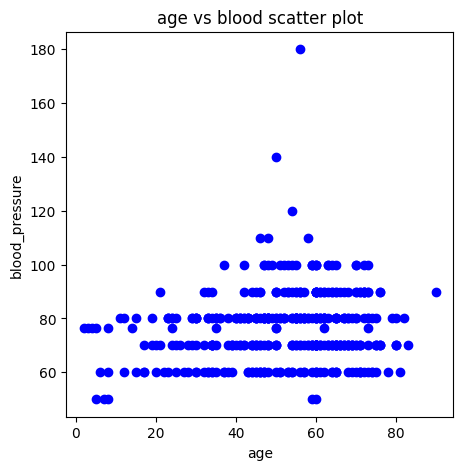

In [ ]:
import matplotlib.pyplot as plt
fig=plt.figure(figsize=(5,5))
plt.scatter(data['age'],data['blood_pressure'],color='blue')
plt.xlabel('age')
plt.ylabel('blood_pressure')
plt.title("age vs blood scatter plot")

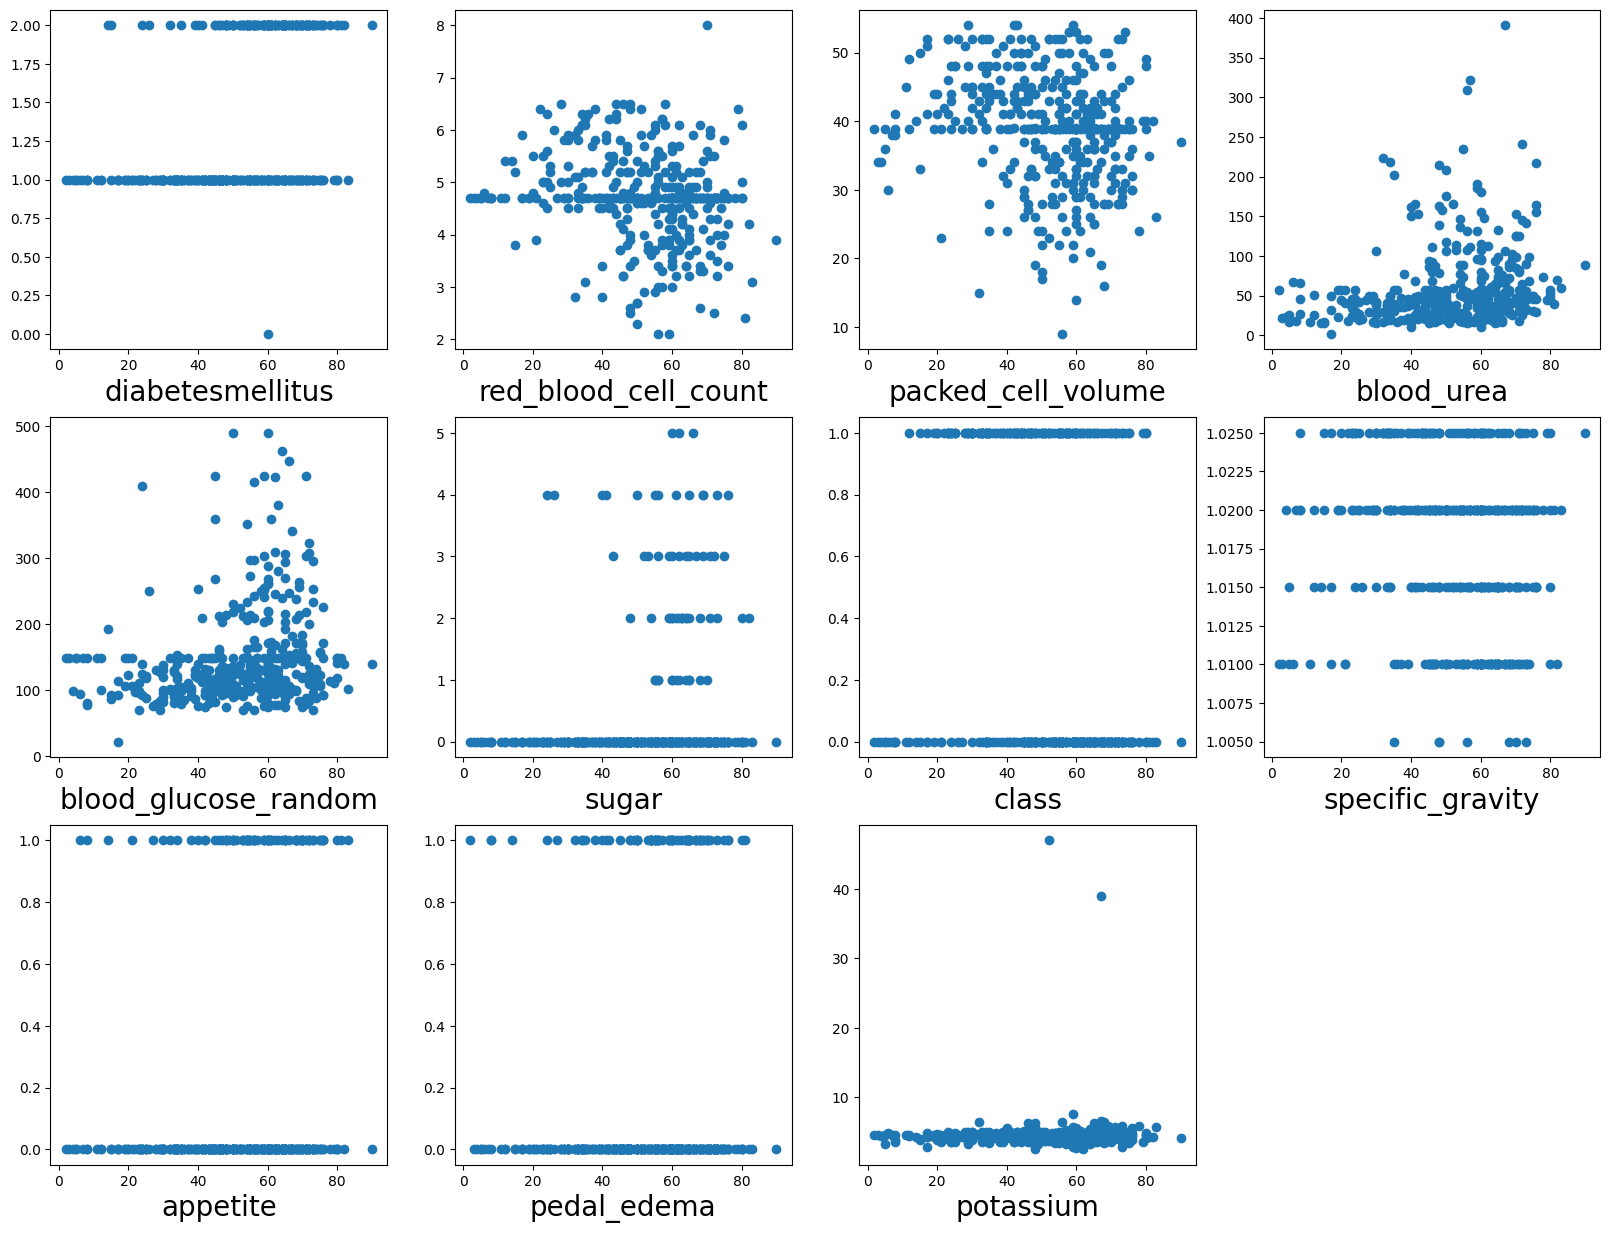

In [ ]:
plt.figure(figsize=(20,15),facecolor='white')
plotnumber=1

for column in contcols:
  if plotnumber<=11:
    ax=plt.subplot(3,4,plotnumber)
    plt.scatter(data['age'],data[column])
    plt.xlabel(column,fontsize=20)
  plotnumber+=1
plt.show()   

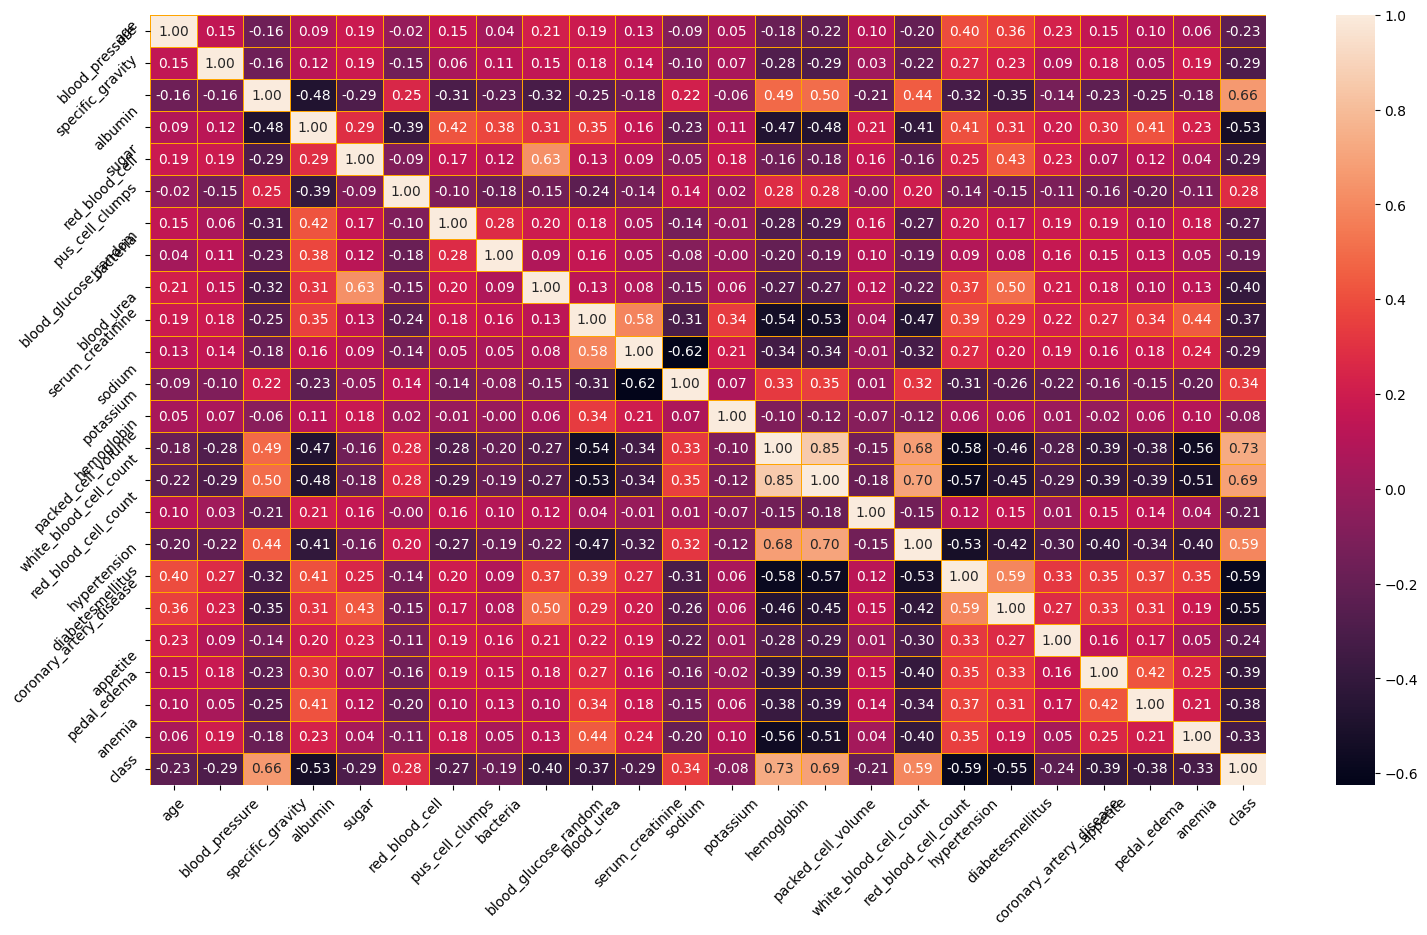

In [ ]:
f,ax=plt.subplots(figsize=(18,10))
sns.heatmap(data.corr(),annot=True,fmt=".2f",ax=ax,linewidths=0.5,linecolor="orange")
plt.xticks(rotation=45)
plt.yticks(rotation=45)
plt.show()

In [ ]:
data['class'].unique()

array([0, 1])

<Axes: ylabel='count'>

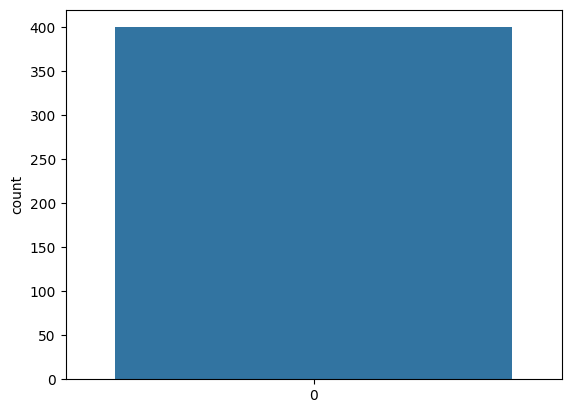

In [ ]:
sns.countplot(data['class'])

In [ ]:
from sklearn.preprocessing import standardScaler
sc=StandardScaler()
x_bal=sc.fit_transform(x)

ImportError: ignored

In [ ]:
setcols=['red_blood_cells','pus_cell','blood_glucose_random','blood_urea',
         'pedal_edema','anemia','diabetesmellitus','coronary_artery_disease']
x=pd.DataFrame(data,columns=setcols)
y=pd.DataFrame(data,columns=['class'])
print(x.shape)
print(y.shape)         

(400, 8)
(400, 1)


In [ ]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.2,random_state=2)
print(x_train.shape)
print(y_train.shape)
print(x_test.shape)
print(y_test.shape)

NameError: ignored

In [ ]:
import tensorflow
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense

In [ ]:
classification=Sequential()
classification.add(Dense(30,activation='relu'))
classification.add(Dense(128,activation='relu'))
classification.add(Dense(64,activation='relu'))
classification.add(Dense(32,activation='relu'))
classification.add(Dense(1,activation='sigmoid'))

In [ ]:
classification.compile(optimizer='adam',loss='binary_crossentropy',metrics=['accuracy'])
classification.fit(x_train,y_train,batch_size=10,vaidation_split=0.2,epochs=100)


In [ ]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.2,random_state=2)
print(x_train.shape)
print(y_train.shape)
print(x_test.shape)
print(y_test.shape)

(320, 8)
(320, 1)
(80, 8)
(80, 1)


In [ ]:
classification.fit(x_train,y_train,batch_size=10,validation_split=0.2,epochs=100)

ValueError: ignored

In [ ]:
from sklearn.ensemble import RandomForestClassifier
rfc=RandomForestClassifier(n_estimators=10,criterion='entropy')
rfc.fit(x_train,y_train)
RandomForestClassifier(criterion='entropy',n_estimators=10)
y_predict = rfc.predict(x_test)
y_predict_train = rfc.predict(x_train)

ValueError: ignored

In [ ]:
from sklearn.tree import DecisionTreeClassifier
dtc=DecisionTreeClassifier(max_depth=4,splitter='best',criterion='entropy')
dtc.fit(x_train,y_train)
DecisionTreeClassifier(criterion='entropy',max_depth=4)
y_predict=dtc.predict(x_test)
y_predict
y_pretict_train=dtc.predict(x_train)

In [ ]:
from sklearn.linear_model import LogisticRegression
lgr=LogisticRegression()
lgr.fit(x_train,y_train)
LogisticRegression()
from sklearn.metrics import  accuracy_score,classification_report
y_predict=lgr.predict(x_test)

In [ ]:
y_pred=lgr.predict([[1,1,121.000000,36.0,0,0,1,0]])
print(y_pred)
(y_pred)

In [ ]:
y_pred=dtc.predict([[1,1,121.000000,36.0,0,0,1,0]])
print(y_pred)
(y_pred)


In [ ]:
y_pred=rfc.predict([[1,1,121.000000,36.0,0,0,1,0]])
print(y_pred)
(y_pred)

In [ ]:
classification.save("ckd.h5")
y_pred=classification.predict(x_test)
y_pred
y_pred=(y_pred>0.5)
y_pred

ValueError: ignored

In [ ]:
def predict_exit(sample_value):
  sample_value=np.array(sample_value)
  sample_value=sample_value.reshape(1,-1)
  sample_vaue=sc.transform(sample_value)
  return classifier.predict(sample_value)
  test=classification.predict([[1,1,121.000000,36.0,0,0,1,0]])
  if 
     test==1
    print('prediction:High change of CKD!')
  else
    print('prediction:Low change of CKD.')
       

IndentationError: ignored

In [ ]:
from sklearn import model_selection
dfs=[]
models=[
        ('LogReg',LogisticRegression()),
        ('RF',RandomForestClassifier()),
        ('DecisionTree',DecisionTreeClassifier()),
        
       ]
results=[]
names=[]
scoring=['accuracy','precision_weighted','recall_weited','roc_auc']
target_names=['NO CKD','CKD']
 for name,model in models:
     kfold=model_selectioon.kfold(n_splits=5,shuffle=True,random_state=90210)
     cv_results=model_selection.cross_validate(model,x_train,y_train,cv=kfold,scoring=scoring)
     clf=model.fit(x_train,y_train)
     y_pred=clf.predict(x_test)
     print(name) 
     print(classification_report(y_test,y_pred,target_names=target_names))
     results.append(cv_results) 
     names.append(name)
     this_df=pd.DataFrame(cv_results) 
     this_df['model']=name
     dfs.append(this_df)
final=pd.concat(dfs,ignore_index=True)
return final         

IndentationError: ignored

In [ ]:
classification.compile(optimizer='adam',loss='binary_crossentropy',metrics=['accuracy'])
classification.fit(x_train,y_train,batch_size=10,validation_split=0.2,epochs=100)

ValueError: ignored

In [ ]:
from sklearn.linear_model import LogisticRegression
lgr=LogisticRegression()
lgr.fit(x_train,y_train)

ValueError: ignored

In [ ]:
y_pred=lgr.predict([[129,99,1,0,0,1,0,1]])

/usr/local/lib/python3.9/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but LogisticRegression was fitted with feature names
  warnings.warn(


AttributeError: ignored

<ipython-input-52-868c85374ad7>:1: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(data.age)


<Axes: xlabel='age', ylabel='Density'>

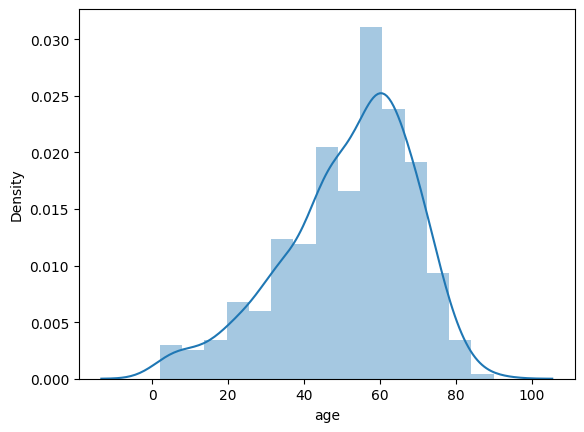

In [ ]:
sns.distplot(data.age)

Text(0.5, 1.0, 'age vs blood scatter plot')

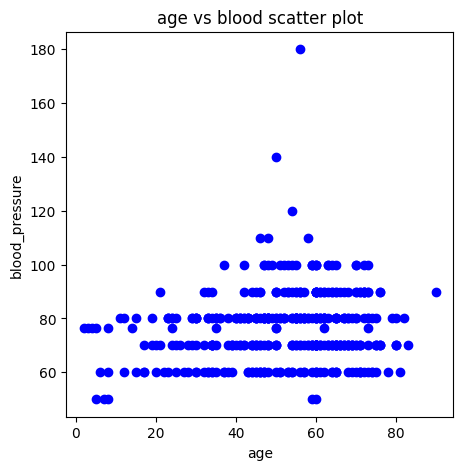

In [ ]:
import matplotlib.pyplot as plt
fig=plt.figure(figsize=(5,5))
plt.scatter(data['age'],data['blood_pressure'],color='blue')
plt.xlabel('age')
plt.ylabel('blood_pressure')
plt.title("age vs blood scatter plot")


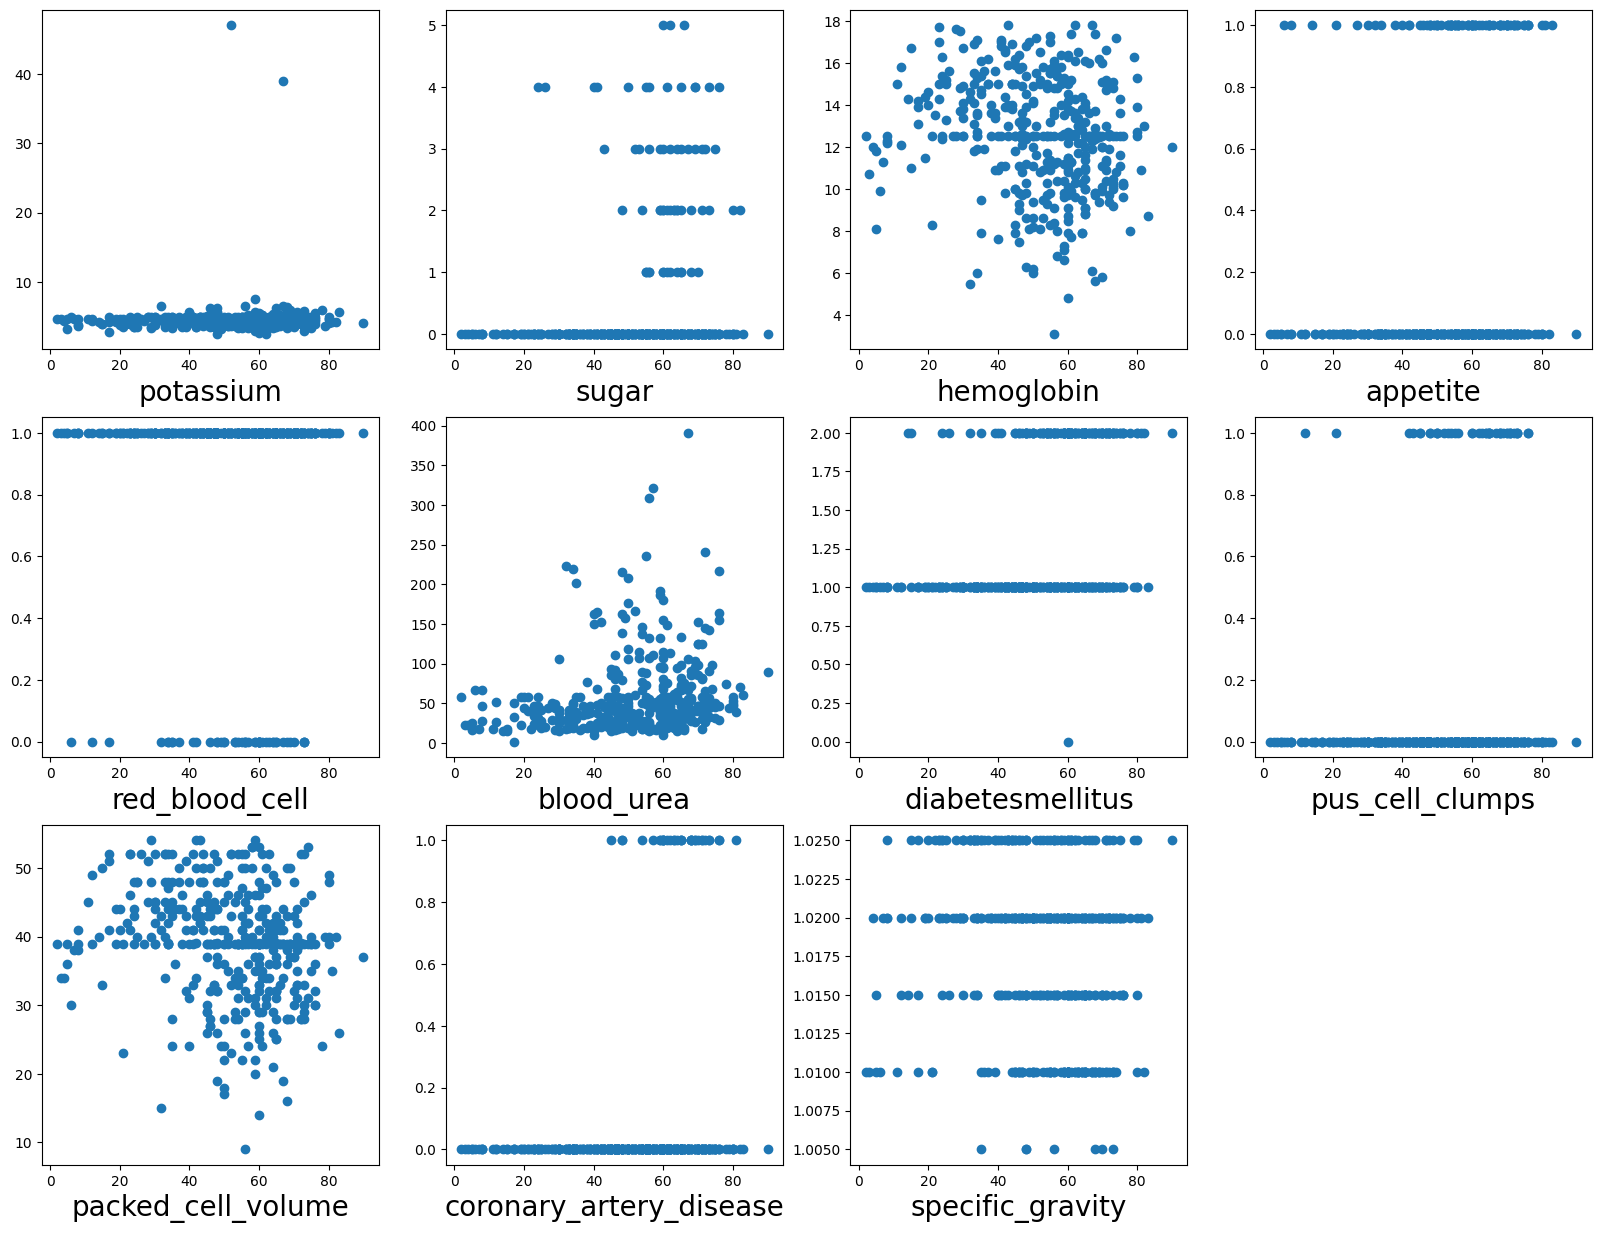

In [ ]:
plt.figure(figsize=(20,15),facecolor='white')
plotnumber=1
for column in contcols:
  if plotnumber<=11:
    ax=plt.subplot(3,4,plotnumber)
    plt.scatter(data['age'],data[column])
    plt.xlabel(column,fontsize=20)
    plotnumber+=1
plt.show()   

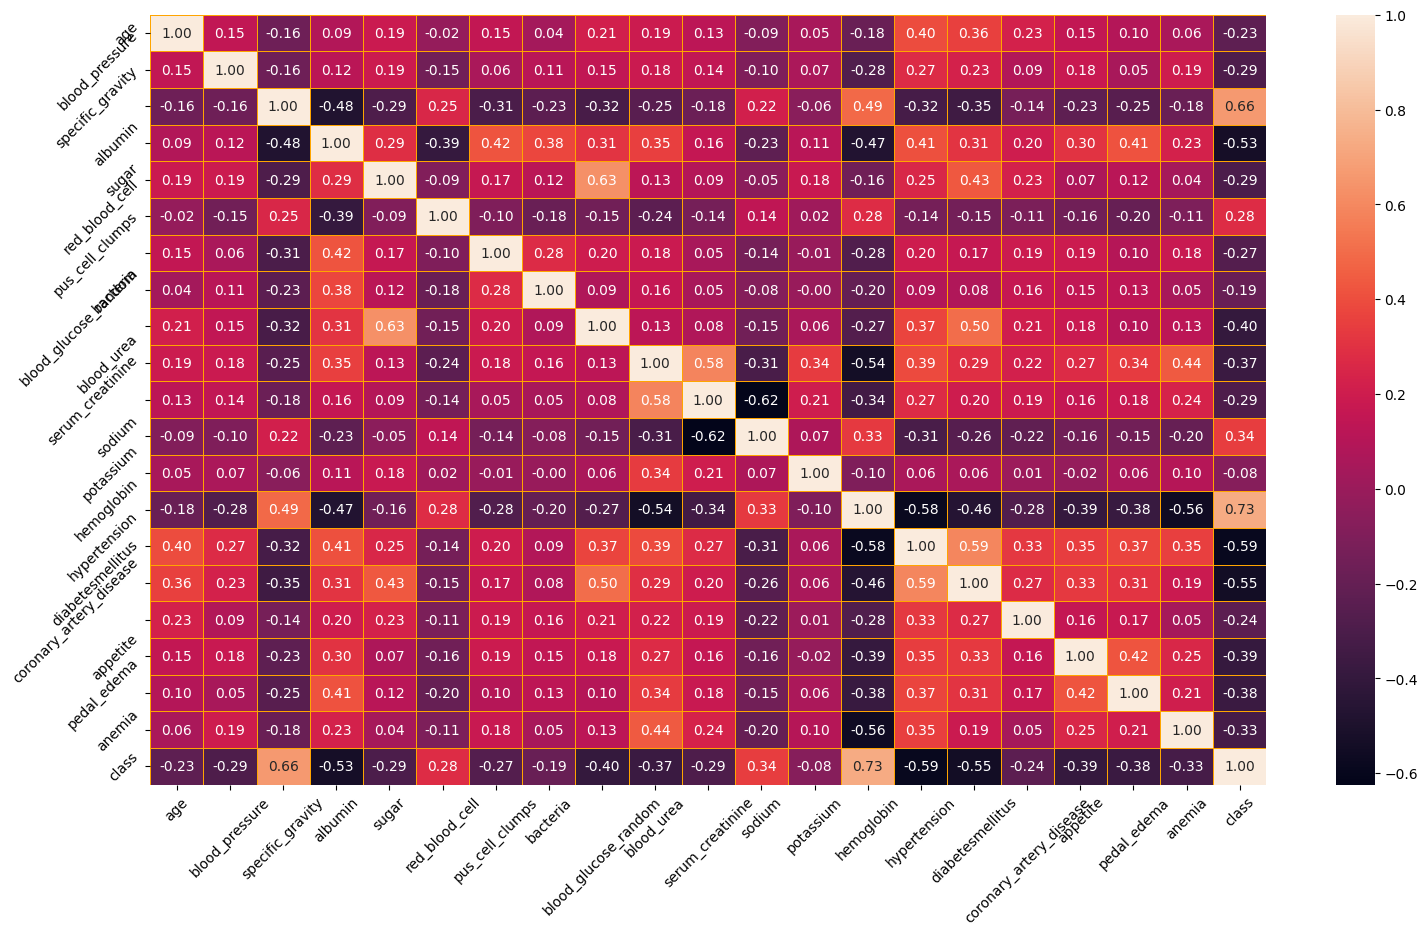

In [ ]:
f,ax=plt.subplots(figsize=(18,10))
sns.heatmap(data.corr(),annot=True,fmt=".2f",ax=ax,linewidths=0.5,linecolor="orange")
plt.xticks(rotation=45)
plt.yticks(rotation=45)
plt.show()


In [ ]:
data['class'].unique()

NameError: ignored

<Axes: ylabel='count'>

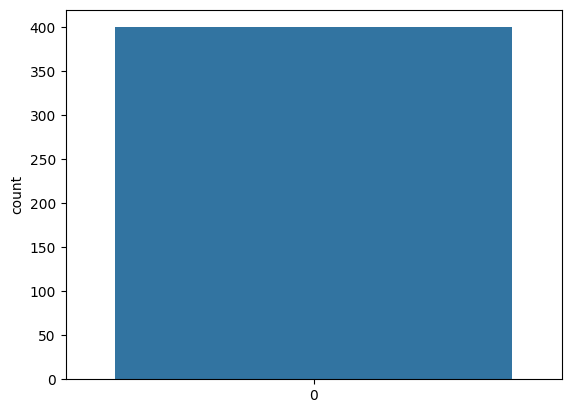

In [ ]:
sns.countplot(data['class'])

In [ ]:
setcols=['red_blood_cells','pus_cell','blood_glucose_random','blood_urea',
         'pedal_edema','anemia','diabetesmellitus','coronary_artery_disease']
x=pd.DataFrame(data,columns=setcols)
y=pd.DataFrame(data,columns=['class'])
print(x.shape)
print(y.shape)       

(400, 8)
(400, 1)


In [ ]:
from sklearn.linear_model import LogisticRegression
lgr=LogisticRegression()
lgr.fit(x_train,y_train)

ValueError: ignored

In [ ]:
from sklearn.preprocessing  import standardscaler

ImportError: ignored